In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle

# from compute_sta import compute_sta

In [140]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for specified number of timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = sum(rho[spike_times] ==1)
    
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here.
#     stim_windows = np.zeros((num_timesteps,))
    for i in range(1,len(stim_windows)):#for possible time window from time-i to time
        sta[i] = np.mean([stim[spike_time-i:spike_time]  for spike_time in spike_times]) #get the mean of the time windows in parralel
    sta[0] = np.mean([stim[spike_time]  for spike_time in spike_times]) #get the mean of the time windows at the spike times (since can't use same code as in loop)
    sta = np.array(list(reversed(sta))) #reverse for plot
    return sta

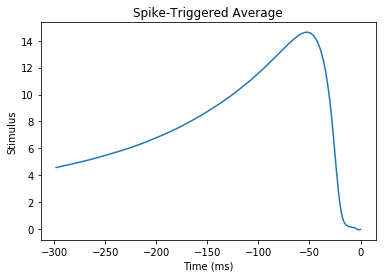

In [141]:
FILENAME = '../../data/c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
    
stim = data['stim']
rho = data['rho']
    

# # Fill in these values
sampling_period = (1/500)*1000 # in ms
num_timesteps = int(300/sampling_period)

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()